In [1]:
# Import Libraries and Load Dataset

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


Using TensorFlow backend.


In [2]:
# verify tensorflow version
tf.__version__


'2.0.0'

In [3]:
# Read Dataframe
df = pd.read_csv('bank.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Verify null values
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#Lets analysze the distribution of the various attribute
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
df.nunique() # Number of unique values in a column

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

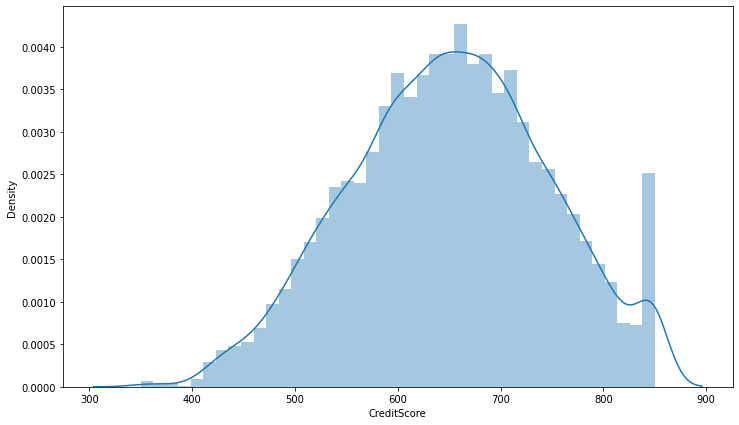

In [9]:
# Plot Creditscore
plt.figure(figsize=(12,7))
sns.distplot(df.CreditScore);

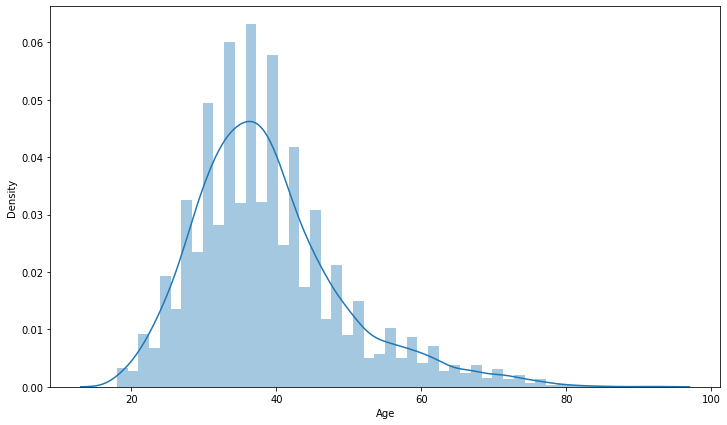

In [10]:
plt.figure(figsize=(12,7))
sns.distplot(df.Age);

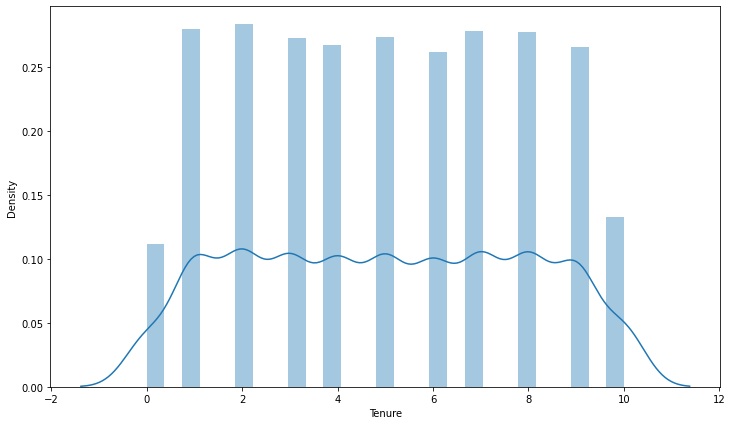

In [11]:
plt.figure(figsize=(12,7))
sns.distplot(df.Tenure);

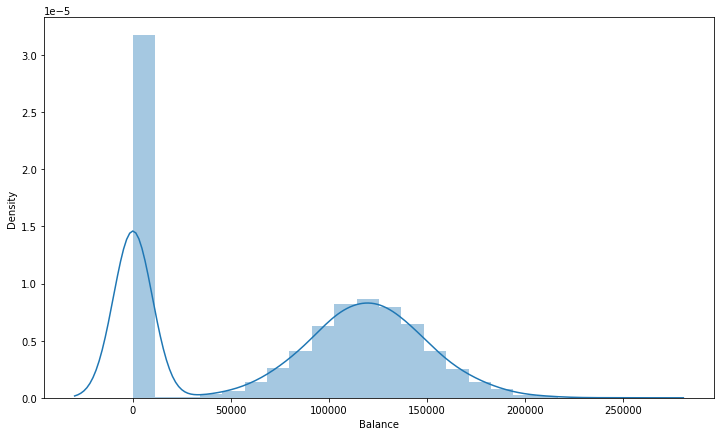

In [12]:
plt.figure(figsize=(12,7))
sns.distplot(df.Balance);

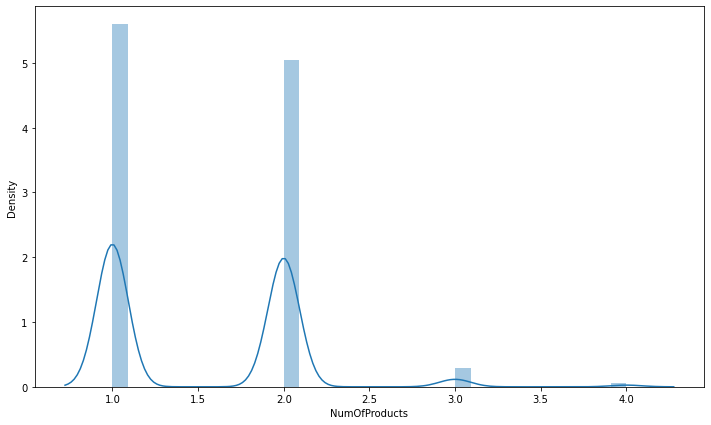

In [13]:
plt.figure(figsize=(12,7))
sns.distplot(df.NumOfProducts);

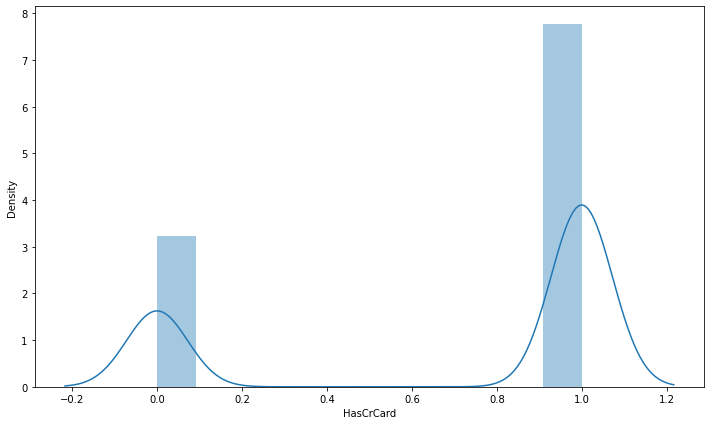

In [14]:
plt.figure(figsize=(12,7))
sns.distplot(df.HasCrCard);

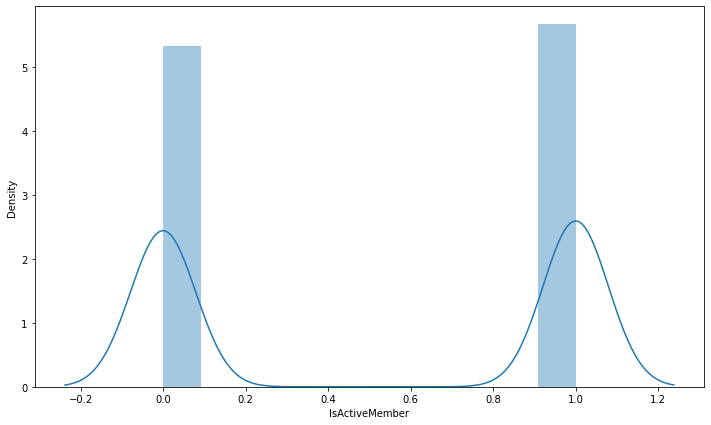

In [15]:
plt.figure(figsize=(12,7))
sns.distplot(df.IsActiveMember);

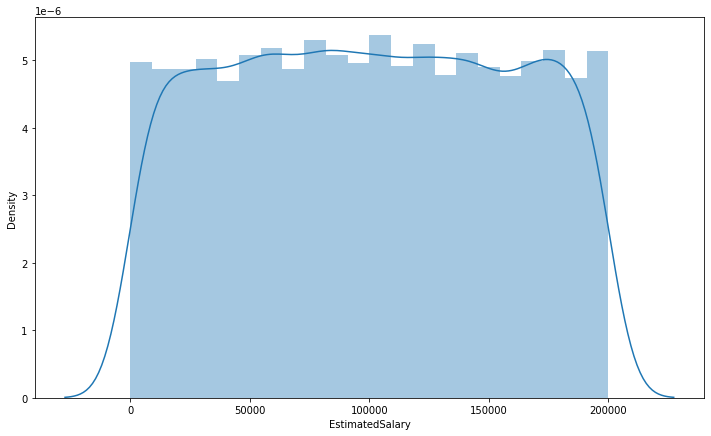

In [16]:
plt.figure(figsize=(12,7))
sns.distplot(df.EstimatedSalary);

In [17]:
# Remove first 3 columns and the last column, it is not required further
x = df.iloc[:, 3:-1].values

# Get the target variable
y = df.iloc[:, -1].values

In [18]:

print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [19]:
print(y)

[1 0 1 ... 1 1 0]


In [20]:
# Label encoding for Geography
le = LabelEncoder()
# Get all the rwos for the 2 column and encode them.
x[:, 2] = le.fit_transform(x[:, 2])
print(x)


[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [21]:
# One hot Encoding for Gender
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [22]:
# Split Test Train Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8000, 12) (2000, 12) (8000,) (2000,)


In [23]:
# Normalize Data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
# Build ANN
classifier = Sequential()
# Input Layer with 6 Nodes
classifier.add(Dense(units = 6, activation = 'relu'))
# Hidden Layer with 6 Nodes
classifier.add(Dense(units = 6, activation = 'relu'))
# Output Layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))


In [25]:
# Compile model with sigmoid optimizer
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [26]:
model = classifier.fit(x_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
8000/8000 [==============================] - 1s 165us/step - loss: 0.5105 - accuracy: 0.78550s - loss:
Epoch 2/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.4609 - accuracy: 0.7984
Epoch 3/100
8000/8000 [==============================] - 2s 212us/step - loss: 0.4435 - accuracy: 0.8024
Epoch 4/100
8000/8000 [==============================] - 2s 211us/step - loss: 0.4311 - accuracy: 0.8071
Epoch 5/100
8000/8000 [==============================] - 2s 189us/step - loss: 0.4220 - accuracy: 0.8127
Epoch 6/100
8000/8000 [==============================] - 2s 205us/step - loss: 0.4141 - accuracy: 0.8189
Epoch 7/100
8000/8000 [==============================] - 2s 219us/step - loss: 0.4052 - accuracy: 0.8288
Epoch 8/100
8000/8000 [==============================] - 1s 171us/step - loss: 0.3938 - accuracy: 0.8400
Epoch 9/100
8000/8000 [==============================] - 2s 204us/step - loss: 0.3810 - accuracy: 0.8460
Epoch 10/100
8000/8000 [=====================

8000/8000 [==============================] - 1s 129us/step - loss: 0.3360 - accuracy: 0.8616
Epoch 78/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.3361 - accuracy: 0.8619
Epoch 79/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.3356 - accuracy: 0.8622
Epoch 80/100
8000/8000 [==============================] - 1s 130us/step - loss: 0.3357 - accuracy: 0.8629
Epoch 81/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.3356 - accuracy: 0.8618
Epoch 82/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.3358 - accuracy: 0.8614
Epoch 83/100
8000/8000 [==============================] - 1s 130us/step - loss: 0.3357 - accuracy: 0.8619
Epoch 84/100
8000/8000 [==============================] - 1s 127us/step - loss: 0.3357 - accuracy: 0.8619
Epoch 85/100
8000/8000 [==============================] - 1s 129us/step - loss: 0.3348 - accuracy: 0.8610
Epoch 86/100
8000/8000 [==============================] - 1

In [27]:
# Visualize Summary
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [28]:
y_predicted = classifier.predict(x_test)
# Convert Predicted probabilities into binary outcome
y_predicted = (y_predicted > 0.5)
print(np.concatenate((y_predicted.reshape(len(y_predicted),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [29]:
# Lets take single customer to predict whether customer will stay or not.
print(classifier.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
# Our model predicts that this customer stays in the bank.

[[0.01712756]]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test.astype('int'), y_predicted.astype('int')))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1585
           1       0.80      0.47      0.60       415

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



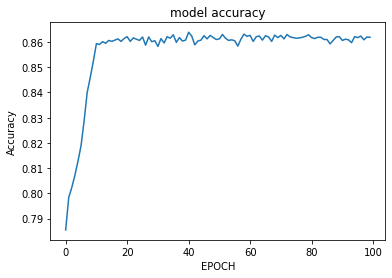

In [36]:
#Accuracy 
model.history.keys()
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('EPOCH')
plt.show()

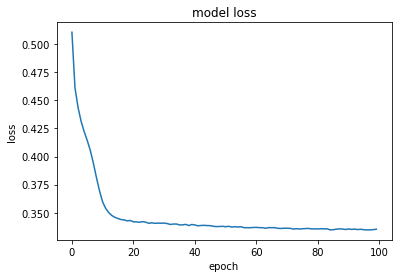

In [37]:
#loss 
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [33]:
# Total Accuracy
accuracy_score(y_test, y_predicted)



0.867

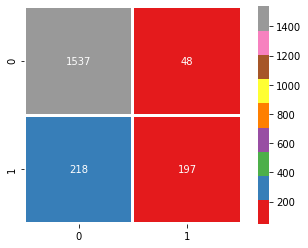

In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test.astype('int'), y_predicted.astype('int'))
sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
linewidths = 2,linecolor = "w",cmap = "Set1")
plt.subplots_adjust(wspace = .3,hspace = .3)



###  Accuracy = 86.7%

### Total correct predictions that customers stay in bank = 1537

### Total correct predictions that customers leave the bank = 197

### Total incorrect predictions that customers stay the bank = 218

### Total incorrect predictions that customers leave the bank = 48